# 20~40대 남성의 쇼핑 카테고리 분석

## 트렌드 파악

In [97]:
%matplotlib inline
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rc 
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [107]:
headers = {"X-Naver-Client-Id": "WZoL0mMO_Cuto8CEhRNp", 
           "X-Naver-Client-Secret":"ZsyAGudPZ6"}

url = "https://openapi.naver.com/v1/datalab/shopping/categories"

categories = [
      {"name": "패션잡화", "param": [ "50000001"]},
      {"name": "화장품/미용", "param": [ "50000002"]},
      {"name": "가구/인테리어", "param": [ "50000004"]},
      {"name": "출산/육아", "param": [ "50000005"]},
      {"name": "식품", "param": [ "50000006"]},
      {"name": "스포츠/레저", "param": [ "50000007"]},
      {"name": "생활/건강", "param": [ "50000008"]},
      {"name": "여가/생활편의", "param": [ "50000009"]},
      {"name": "면세", "param": [ "50000010"]}
  ]

data = {
  "startDate": "2020-01-01",
  "endDate": "2022-04-30",
  "timeUnit": "month",
  "category": [
      {"name": "디지털/가전", "param": [ "50000003"]},
      {"name": "패션의류", "param": [ "50000000"]},],
  "gender": "m",
  "ages": [ "20",  "30", "40"]
}

In [99]:
#인덱스 변경하는 함수 정의
def change_index(df, column_name):
    df = df.set_index("period") #데이터프레임 period를 인덱스로
    df.columns = [column_name] #칼럼 정의
    return df

<AxesSubplot:xlabel='period'>

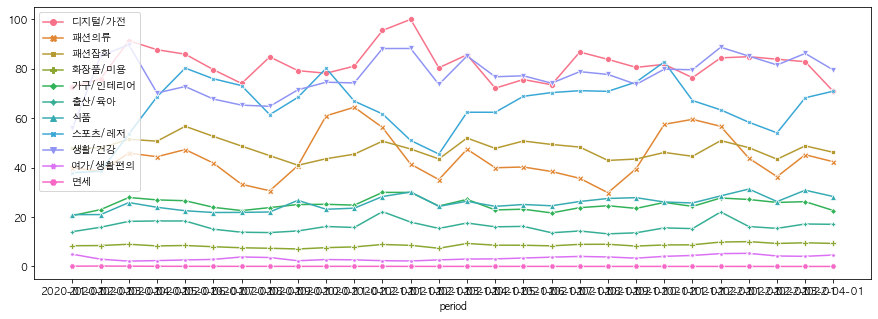

In [82]:
#data 입력값 대로 값 뽑기
response = requests.post(url, headers=headers, json=data)

#결과값
results = response.json()["results"]

#예시
df_a = change_index(pd.DataFrame(results[0]["data"]), "디지털/가전")
df_b = change_index(pd.DataFrame(results[1]["data"]), "패션의류")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

#categories에 있는 category 돌기
for category in categories:
    if len(data["category"]) > 2: 
        data["category"].pop(2)
    data["category"].append(category)
    
    result = requests.post(url, headers=headers, json=data)

    results = result.json()["results"]

    df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

    df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    
# 시각화
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)

# excel파일 변환
# df_all.to_excel("click_ratio.xlsx", sheet_name="click ratio")

20대-40대 남성 쇼핑 클릭
디지털/가전, 생활/건강, 스포츠/레저 상위 카테고리 3개

**스포츠/레저의 경우 코로나 유행시기 저조하다가 회복, 다만 계절성이 있는 것으로 보임(여름 상승)**
**패션의류 역시 계절성 (겨울 상승)**

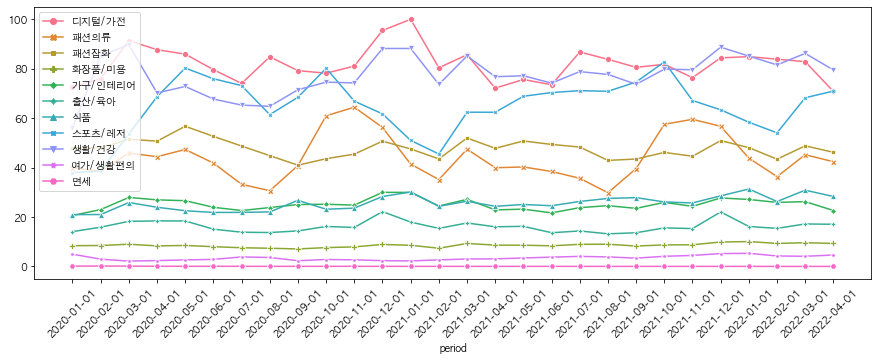

In [88]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)
plt.xticks(rotation=45)
plt.savefig('male')

In [83]:
#excel파일 변환
df_all.to_excel("click_ratio.xlsx", sheet_name="click ratio")

20-40 남성 쇼핑 트렌드의 계절성 파악을 위해 전체 기간 조회

In [89]:
data_male = {
  "startDate": "2017-08-01",
  "endDate": "2022-04-30",
  "timeUnit": "month",
  "category": [
      {"name": "디지털/가전", "param": [ "50000003"]},
      {"name": "패션의류", "param": [ "50000000"]},],
  "gender": "m",
  "ages": [ "20",  "30", "40"]
}

<AxesSubplot:xlabel='period'>

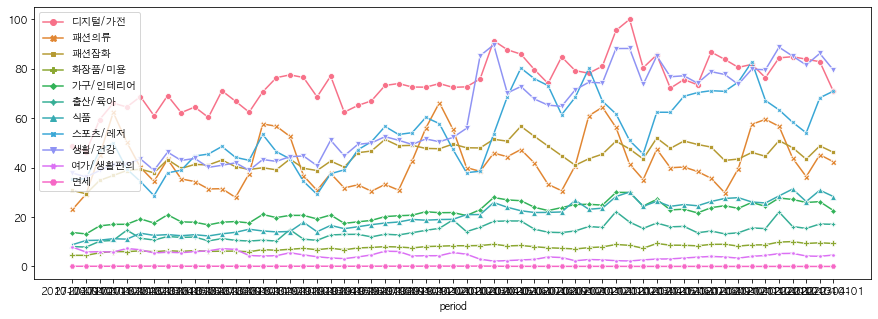

In [90]:
#data 입력값 대로 값 뽑기
response = requests.post(url, headers=headers, json=data_male)

#결과값
results = response.json()["results"]

#예시
df_a = change_index(pd.DataFrame(results[0]["data"]), "디지털/가전")
df_b = change_index(pd.DataFrame(results[1]["data"]), "패션의류")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

for category in categories:
    if len(data_male["category"]) > 2: 
        data_male["category"].pop(2)
    data_male["category"].append(category)
    
    result = requests.post(url, headers=headers, json=data_male)
    
    results = result.json()["results"]

    df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

    df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    
# 시각화
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)

# excel파일 변환
# df_all.to_excel("click_ratio_male.xlsx", sheet_name="click ratio")

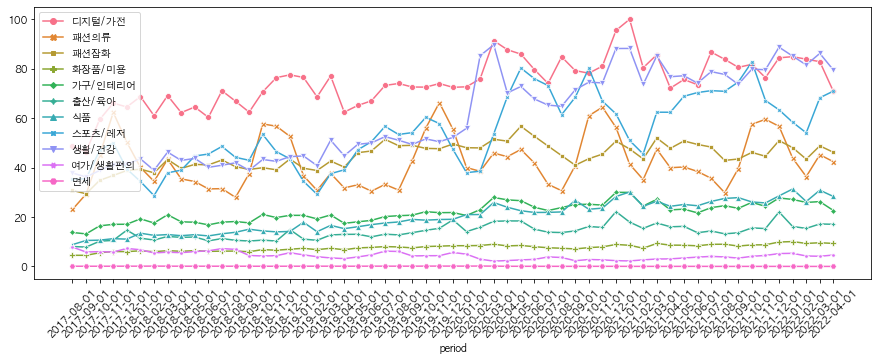

In [91]:
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)
plt.xticks(rotation=45)
plt.savefig('male')

코로나 이후 급격하게 생활/건강 카테고리 상승 → 마스크, 위생 관련 제품으로 예상 \
스포츠/레저 역시 코로나 유행 이후 빠르게 상승 → 야외활동, 운동 감소로 홈트족의 증가로 인한 상승으로 예상\
디지털/가전 의 경우 전기간 상위권을 유지 → 남성 고객 성장에 테크 카테고리가 적합함을 알 수 있음
패션의류의 경우 뚜렷한 계절성이 확인됨

In [93]:
df_all.to_excel("click_ratio_male.xlsx", sheet_name="click ratio")

In [100]:
data_female = {
  "startDate": "2017-08-01",
  "endDate": "2022-04-30",
  "timeUnit": "month",
  "category": [
      {"name": "디지털/가전", "param": [ "50000003"]},
      {"name": "패션의류", "param": [ "50000000"]},],
  "gender": "f",
  "ages": [ "20",  "30", "40"]
}

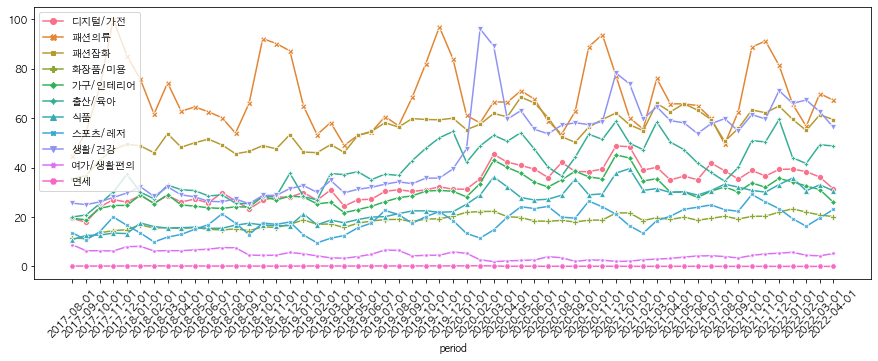

In [108]:
#data 입력값 대로 값 뽑기
response = requests.post(url, headers=headers, json=data_female)

#결과값
results = response.json()["results"]

#예시
df_a = change_index(pd.DataFrame(results[0]["data"]), "디지털/가전")
df_b = change_index(pd.DataFrame(results[1]["data"]), "패션의류")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

for category in categories:
    if len(data_female["category"]) > 2: 
        data_female["category"].pop(2)
    data_female["category"].append(category)
    
    result = requests.post(url, headers=headers, json=data_female)
    
    results = result.json()["results"]

    df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

    df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    
# 시각화
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)
plt.xticks(rotation=45)
plt.savefig('female')

# excel파일 변환
# df_all.to_excel("click_ratio_male.xlsx", sheet_name="click ratio")

In [109]:
df_all.to_excel("click_ratio_female.xlsx", sheet_name="click ratio")

In [138]:
# 음향기기 100005022
# 캠핑 100004258

data_trend = {
  "startDate": "2017-08-01",
  "endDate": "2022-04-30",
  "timeUnit": "month",
  "category": [
      {"name": "음향기기", "param": [ "50002334"]},
      {"name": "캠핑", "param": [ "50009341"]},],
  "gender": "",
  "ages": [ "20", "30", "40"]
}

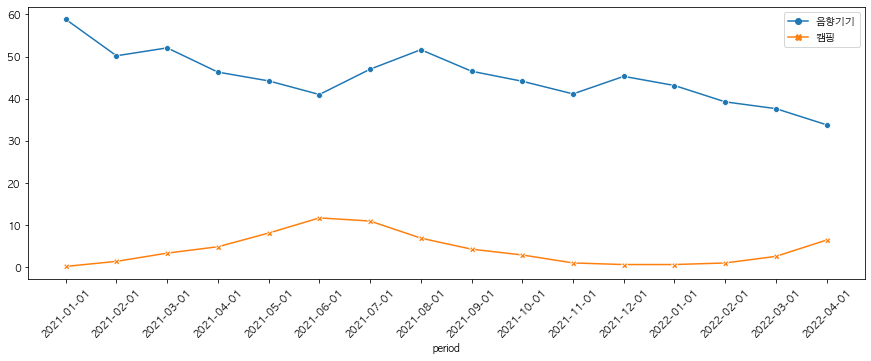

In [139]:
#data 입력값 대로 값 뽑기
response = requests.post(url, headers=headers, json=data_trend)

#결과값
results = response.json()["results"]

#예시
df_a = change_index(pd.DataFrame(results[0]["data"]), "음향기기")
df_b = change_index(pd.DataFrame(results[1]["data"]), "캠핑")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

# for category in categories:
#     if len(data_female["category"]) > 2: 
#         data_female["category"].pop(2)
#     data_female["category"].append(category)
    
#     result = requests.post(url, headers=headers, json=data_female)
    
#     results = result.json()["results"]

#     df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

#     df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    
# 시각화
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)
plt.xticks(rotation=45)
plt.savefig('male_trend')

# excel파일 변환
df_all.to_excel("click_ratio_trend.xlsx", sheet_name="click ratio")

In [140]:
# 음향기기 100005022
# 캠핑 100004258

data_m_trend = {
  "startDate": "2017-08-01",
  "endDate": "2022-04-30",
  "timeUnit": "month",
  "category": [
      {"name": "음향기기", "param": [ "50002334"]},
      {"name": "캠핑", "param": [ "50009341"]},],
  "gender": "m",
  "ages": [ "20", "30", "40"]
}

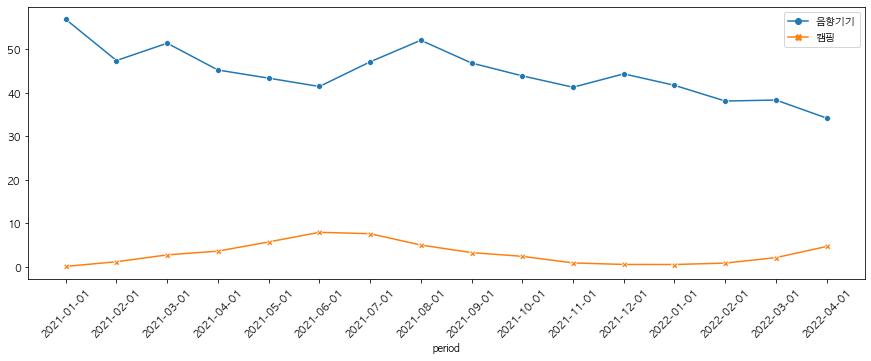

In [141]:
#data 입력값 대로 값 뽑기
response = requests.post(url, headers=headers, json=data_m_trend)

#결과값
results = response.json()["results"]

#예시
df_a = change_index(pd.DataFrame(results[0]["data"]), "음향기기")
df_b = change_index(pd.DataFrame(results[1]["data"]), "캠핑")

df_all = pd.merge(df_a, df_b, left_on="period", right_on="period")

# for category in categories:
#     if len(data_female["category"]) > 2: 
#         data_female["category"].pop(2)
#     data_female["category"].append(category)
    
#     result = requests.post(url, headers=headers, json=data_female)
    
#     results = result.json()["results"]

#     df = change_index(pd.DataFrame(results[2]["data"]), category["name"]) 

#     df_all = pd.merge(df_all, df, left_on="period", right_on="period")
    
# 시각화
plt.figure(figsize=[15,5])
sns.lineplot(data=df_all, markers=True, dashes=False)
plt.xticks(rotation=45)
plt.savefig('male_trend')

# excel파일 변환
df_all.to_excel("click_ratio_trend.xlsx", sheet_name="click ratio")